# A Model of the Reduction of HIV Concentration During Acute Infection

Kristtiya Vachiraseneekul Guerra

In [76]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'


# import functions from the modsim.py module
from modsim import *

In [77]:
######################################################
##              Sets the initial state              ##
##  R = The number of uninfected CD4 lymphocytes    ##
##  L = The number of latently infected cells       ##
##  E = The number of actively infected cells       ##
##  V = The numbber of free virions                 ##
#######################################################

init = State(R = 1000, L = 0, E = 0, V = 1)

,values
R,1000
L,0
E,0
V,1


In [78]:
system = System(t_0 = 0,       # The initial time, which is 0.
                t_end = 120,   # The end time in days
                gamma = 1.36,  # The rate at which new CD4 lymphocytes arise
                tau = 0.2,     # The proportion that CD4 lymphocytes are activated
                mu = 0.00136,  # Rate of HIV independent death of lymphocytes
                beta = 0.00027,# Infection rate
                rho = 0.1,     # Proportion of cells latently infected
                alpha = 0.036, # Activation rate of latently infected cells
                delta = 0.33,  # Rate of removal of actively infected cells
                pi = 100,      # Production rate of free virions
                sigma = 2,     # Rate of removal of free virions
                dt = 0.1,      # Time steps
                init=init)     # 

,values
t_0,0
t_end,120
gamma,1.36
tau,0.2
mu,0.00136
beta,0.00027
rho,0.1
alpha,0.036
delta,0.33
pi,100


In [79]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    
    step = linspace(t_0, t_end, int(t_end /dt)) 
    timesteps = Series(step)
    
    for t in timesteps.index[:-1]:
        frame.row[timesteps[t+1]] = update_func(frame.row[timesteps[t]], dt, system)
    
    return frame

In [80]:
def update_func(state, t, system):
    """Update the HIV model.
    
    state: State(r, l, v, e)
    t: time
    system: System object
    
    returns: State (rlve)
    """
    unpack(system)
    r, l, e, v = state
    

    dl = (rho * beta * r * v) - (mu * l) - (alpha * l)        #The change in latently infected cells
    dr = (gamma * tau) - (mu * r) - (beta * r * v)            #The change in CD4 lymphocytes
    de = (1 - rho) * beta * r * v + (alpha * l) - (delta * e) #The change in actively infected cells
    dv = pi * e - sigma * v                                   #The change in free virions
    
    #The changes are applied to the population of each of the cell types over a time step (dt)
    r += dr * dt  
    l += dl * dt  
    v += dv * dt  
    e += de * dt  
   
    
    return State(R=r, L=l, E=e, V=v)

In [84]:
## Runs the Simulation ##''
results = run_simulation(system, update_func)

,R,L,E,V
0.000000,1000,0,0,1
0.100083,999.864,0.0027,0.0243,0.8
0.200167,999.734,0.00484962,0.0429452,0.883
0.300250,999.601,0.00721497,0.0629966,1.13585
0.400334,999.462,0.0102536,0.0885339,1.53865
0.500417,999.312,0.0143674,0.123018,2.11626
0.600500,999.146,0.0200237,0.1704,2.92319
0.700584,998.958,0.0278347,0.235822,4.04255
0.800667,998.741,0.0386343,0.326271,5.59226
0.900751,998.481,0.05357,0.451364,7.73652


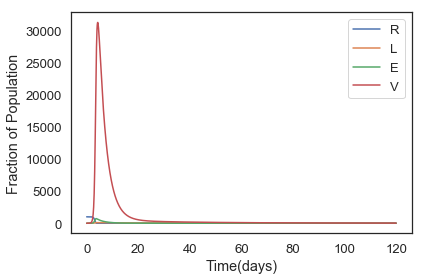

In [87]:
results.plot()
decorate(xlabel='Time(days)', ylabel='Population of Cells')

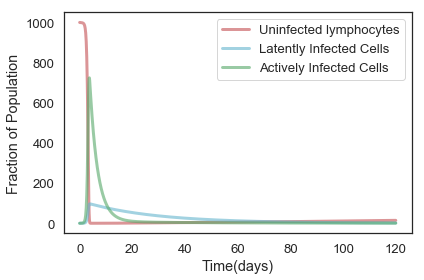

In [88]:
plot(results.R, '-r', label='Uninfected lymphocytes')
plot(results.L, '-c', label='Latently Infected Cells')
plot(results.E, '-g', label='Actively Infected Cells')

decorate(xlabel='Days from Infection (days)', ylabel='Population of cells')